In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore")

# Q.1. Predict delivery time using sorting time
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

## Load Data Set

In [ ]:
df=pd.read_csv('/content/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## EDA and Feature Engineering

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [ ]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [ ]:
#Count of duplicated rows
df[df.duplicated()].shape

(0, 2)

In [ ]:
# Renaming Columns
DTime=df.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
DTime

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


## Data Visualization

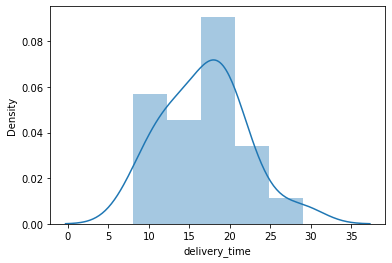

In [ ]:
sns.distplot(DTime['delivery_time'])

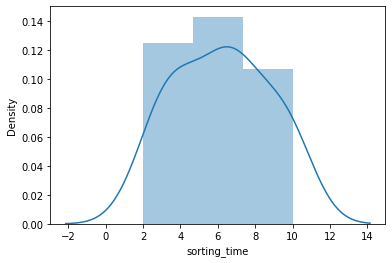

In [ ]:
sns.distplot(DTime['sorting_time'])

## Data Correlation

In [ ]:
DTime.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


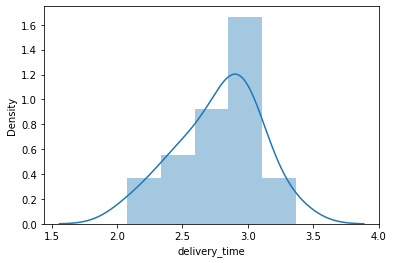

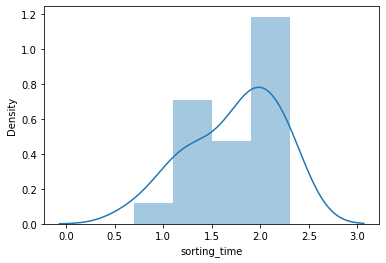

<Figure size 432x288 with 0 Axes>

In [ ]:
## Use any one transformation(LOG,LOG Square,BOX-COX) till skewness is removed

# Performing Log transformations

data=DTime
data['delivery_time'] = np.log(data['delivery_time'])
data['sorting_time'] = np.log(data['sorting_time'])
sns.distplot(data['delivery_time'])
fig = plt.figure()
sns.distplot(data['sorting_time'])
fig = plt.figure()

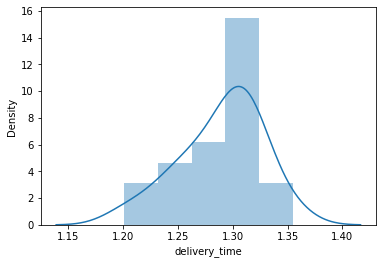

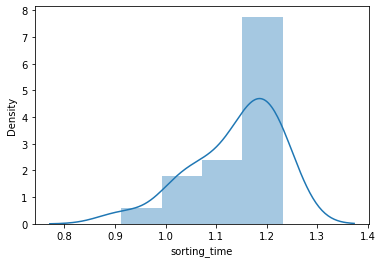

<Figure size 432x288 with 0 Axes>

In [ ]:
# Performing sqrt transformations
data_sqrt = np.sqrt(data)
data_sqrt['delivery_time'] = np.sqrt(data_sqrt['delivery_time'])
data_sqrt['sorting_time'] = np.sqrt(data_sqrt['sorting_time'])
sns.distplot(data_sqrt['delivery_time'])
fig = plt.figure()
sns.distplot(data_sqrt['sorting_time'])
fig = plt.figure()



## Model Building

In [ ]:
import statsmodels.formula.api as smf
model = smf.ols("delivery_time~sorting_time",data = data_sqrt).fit()

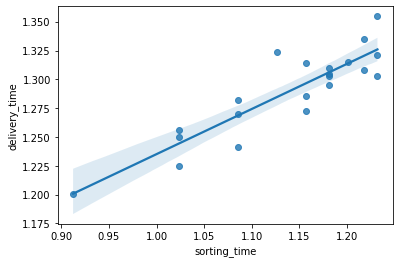

In [ ]:
sns.regplot(x=data_sqrt['sorting_time'],y=data_sqrt['delivery_time'])

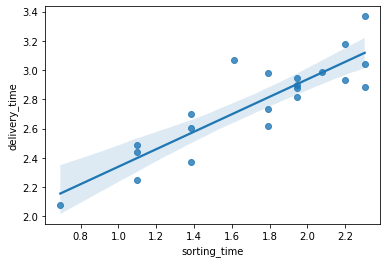

In [ ]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     74.67
Date:                Wed, 02 Nov 2022   Prob (F-statistic):           5.23e-08
Time:                        11:26:55   Log-Likelihood:                 56.138
No. Observations:                  21   AIC:                            -108.3
Df Residuals:                      19   BIC:                            -106.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8434      0.052     16.308      0.000       0.735       0.952
sorting_time     0.3917      0.045      8.641      0.000       0.297       0.487
==============================================================================
Omnibus:                        0.822   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.663   Jarque-Bera (JB):                0.572
Skew:                           0.384   Prob(JB):                        0.751
Kurtosis:                       2.749   Cond. No.                         27.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Finding Coefficient parameters
model.params

Intercept       0.843401
sorting_time    0.391721
dtype: float64

In [ ]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues

(Intercept       16.308287
 sorting_time     8.641312
 dtype: float64, Intercept       1.253366e-12
 sorting_time    5.233659e-08
 dtype: float64)

In [ ]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.7971651708557469, 0.7864896535323651)

## Model Prediction

In [ ]:
print('Delivery time using sorting time :')
model.predict(data)

Delivery time using sorting time :


0     1.745372
1     1.386441
2     1.545271
3     1.704100
4     1.745372
5     1.545271
6     1.605655
7     1.273750
8     1.745372
9     1.704100
10    1.657962
11    1.386441
12    1.605655
13    1.273750
14    1.273750
15    1.386441
16    1.545271
17    1.605655
18    1.114921
19    1.605655
20    1.473851
dtype: float64

# Q.2. Salary_hike -> Build a prediction model for Salary_hike
#Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

In [ ]:
dframe=pd.read_csv('/content/Salary_Data.csv')
dframe.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## EDA and Feature Engineering

In [ ]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
dframe.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
#Count of duplicated rows
dframe[dframe.duplicated()].shape

(0, 2)

In [ ]:
dframe1 = dframe.rename(columns={'YearsExperience':'YE','Salary':'Sal'}, inplace=False)
dframe1.head()

,YE,Sal
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Data Visualization

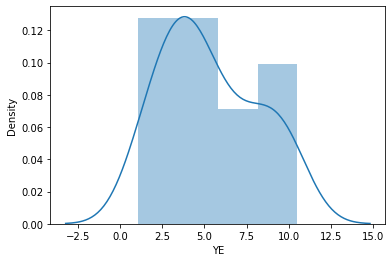

In [ ]:
sns.distplot(dframe1['YE'])

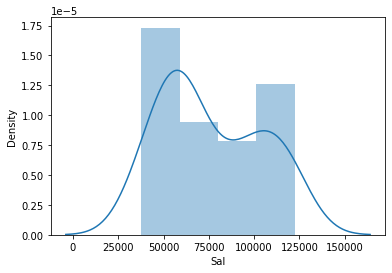

In [ ]:
sns.distplot(dframe1['Sal'])

## Correlation analysis

In [ ]:
dframe1.corr()

,YE,Sal
YE,1.000000,0.978242
Sal,0.978242,1.000000


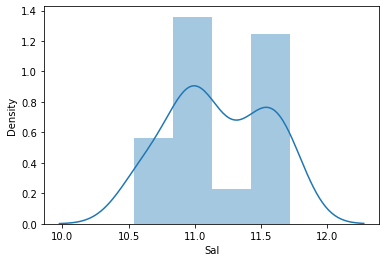

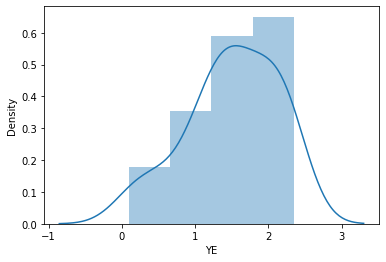

<Figure size 432x288 with 0 Axes>

In [ ]:
# Performing Log transformations

data=dframe1
data['Sal'] = np.log(data['Sal'])
data['YE'] = np.log(data['YE'])
sns.distplot(data['Sal'])
fig = plt.figure()
sns.distplot(data['YE'])
fig = plt.figure()

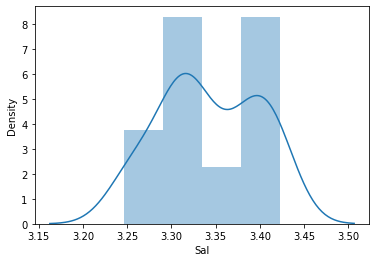

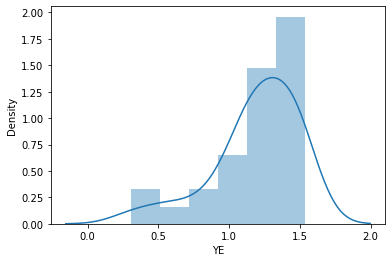

<Figure size 432x288 with 0 Axes>

In [ ]:
# Performing sqrt transformations
data_sqrt =dframe1
data_sqrt['Sal'] = np.sqrt(data_sqrt['Sal'])
data_sqrt['YE'] = np.sqrt(data_sqrt['YE'])
sns.distplot(data_sqrt['Sal'])
fig = plt.figure()
sns.distplot(data_sqrt['YE'])
fig = plt.figure()

## Model Building

In [ ]:
model1=smf.ols('Sal~YE',data=dframe1).fit()

In [ ]:
model1.params

Intercept    3.149146
YE           0.162391
dtype: float64

In [ ]:
#finding tvalues and pvalues
model1.tvalues, model1.pvalues

(Intercept    170.844633
 YE            10.807746
 dtype: float64, Intercept    8.245625e-44
 YE           1.686084e-11
 dtype: float64)

In [ ]:
# Finding Rsquared values
model1.rsquared , model1.rsquared_adj

(0.8066396839912043, 0.7997339584194616)

## Model Prediction

In [ ]:
model1.predict(dframe1)

0     3.199280
1     3.232325
2     3.252550
3     3.284345
4     3.293341
5     3.316709
6     3.319356
7     3.324284
8     3.324284
9     3.334893
10    3.338593
11    3.340347
12    3.340347
13    3.342042
14    3.348304
15    3.353864
16    3.356425
17    3.358857
18    3.365495
19    3.366517
20    3.373981
21    3.376499
22    3.382609
23    3.384704
24    3.387994
25    3.389859
26    3.392802
27    3.393368
28    3.397139
29    3.398159
dtype: float64